<a href="https://colab.research.google.com/github/hugovergnes/drug-PAN/blob/main/code/01_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing and importing required packages:

In [ ]:
import sys
sys.version

'3.6.9 (default, Oct  8 2020, 12:12:24) \n[GCC 8.4.0]'

In [ ]:
!pip install -q torch-scatter -f https://pytorch-geometric.com/whl/torch-1.7.0+cu101.html
!pip install -q torch-sparse -f https://pytorch-geometric.com/whl/torch-1.7.0+cu101.html
!pip install -q torch-geometric
!pip install ogb

     |████████████████████████████████| 11.9MB 12.6MB/s 
     |████████████████████████████████| 24.3MB 1.3MB/s 
     |████████████████████████████████| 194kB 12.0MB/s 
     |████████████████████████████████| 235kB 22.7MB/s 
     |████████████████████████████████| 2.2MB 27.8MB/s 
     |████████████████████████████████| 51kB 6.1MB/s 
     |████████████████████████████████| 61kB 5.0MB/s 
  Created wheel for outdated: filename=outdated-0.2.0-cp36-none-any.whl size=4961 sha256=b000721944daed07eaef2b0f3962b22ad4d2fb2e03781c01daf8ae2775619d1f
  Stored in directory: /root/.cache/pip/wheels/fd/7c/ef/814f514d31197310872b5abf353feb8fef9d67ee658e1e7e39
  Created wheel for littleutils: filename=littleutils-0.2.2-cp36-none-any.whl size=7051 sha256=691a83bc3c97071beb619125e15ad34a6b8cfdcb6b942360b115388bad0a5291
  Stored in directory: /root/.cache/pip/wheels/53/16/9f/ac67d15c40243754fd73f620e1b9b6dedc20492ecc19a2bae1
Successfully built outdated littleutils


In [ ]:
from ogb.graphproppred import PygGraphPropPredDataset, Evaluator
import torch
import torch.nn.functional as F
print(torch.__version__)

1.7.0+cu101


In [ ]:
# Load the dataset 
dataset = PygGraphPropPredDataset(name='ogbg-molhiv')

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Device: {}'.format(device))

split_idx = dataset.get_idx_split()

# Check task type
print('Task type: {}'.format(dataset.task_type))

Device: cpu
Task type: binary classification


In [ ]:
print("Total number of graphs:", len(dataset))
print("Number of classes:", dataset.num_classes)
print("Dimension of node features:", dataset.num_node_features)
print("Dimension of edge features:", dataset.num_edge_features)
print("Number of positive labels:", dataset.data.y.sum().item())
print("Number of negative labels:", dataset.data.y.shape[0] - dataset.data.y.sum().item())

Total number of graphs: 41127
Number of classes: 2
Dimension of node features: 9
Dimension of edge features: 3
Number of positive labels: 1443
Number of negative labels: 39684


In [ ]:
# Checking if all the graphs in the dataset are undirected:
directed_g, undirected_g = 0, 0
for curr_g in dataset:
  if curr_g.is_directed():
    directed_g += 1
  else:
    undirected_g += 1

print("Number of directed graphs:", directed_g)
print("Number of undirected graphs:", undirected_g)

TypeError: ignored

Visualizing a sample graph:

In [ ]:
id = 28
samp_g = dataset[id]
samp_g

Data(edge_attr=[38, 3], edge_index=[2, 38], x=[18, 9], y=[1, 1])

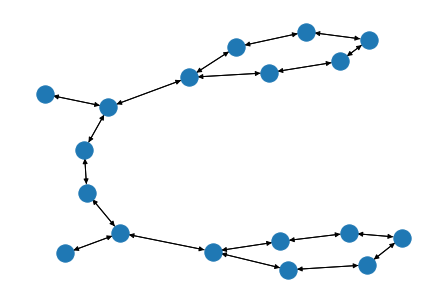

In [ ]:
import networkx as nx
from torch_geometric.utils.convert import to_networkx
samp_g_nx = to_networkx(samp_g)
nx.draw(samp_g_nx[])